# Assignment 1: Basic EDA

1. Read in the "Computers.csv" file. 
2. Explore the target variable, "price". Look at a histogram and boxplot of it.
3. Then, produce histograms of the 'speed' and 'ram' variables. 
4. Feel free to further explore the dataset!

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

computers = pd.read_csv("data/Computers.csv")

computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [7]:
computers.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [8]:
computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


### Explore target

<Axes: xlabel='price', ylabel='Count'>

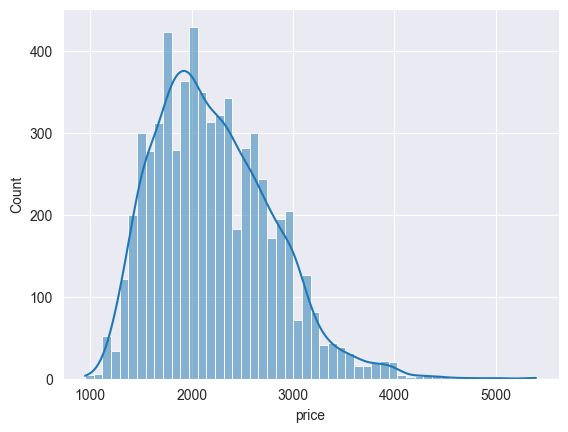

In [10]:
sns.histplot(computers.price, kde=True)

<Axes: xlabel='price'>

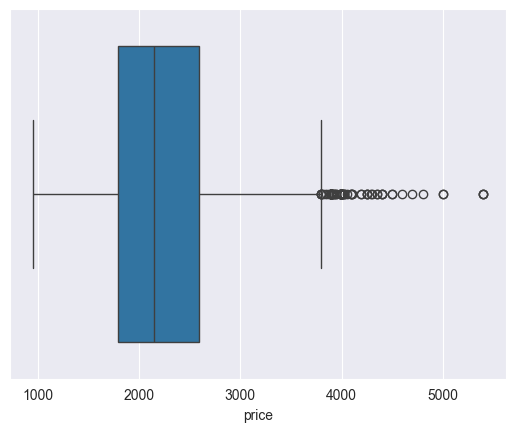

In [19]:
sns.boxplot(x=computers.price)

### Explore the features

<Axes: xlabel='speed'>

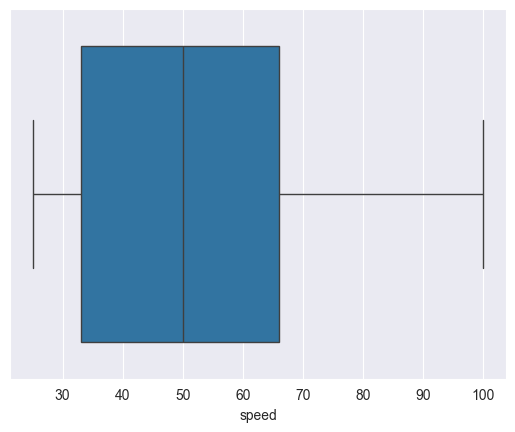

In [20]:
sns.boxplot(x=computers.speed)

<Axes: xlabel='speed'>

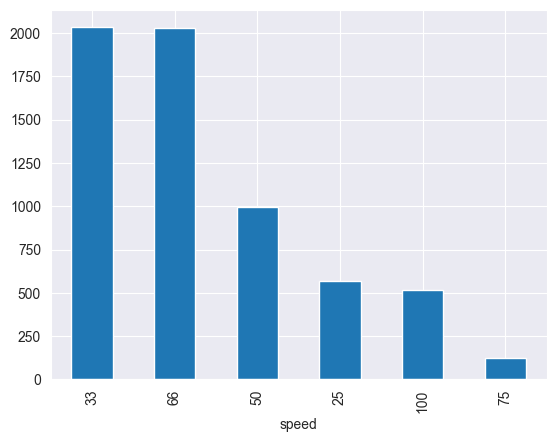

In [15]:
computers.speed.value_counts().plot.bar()

<Axes: xlabel='ram'>

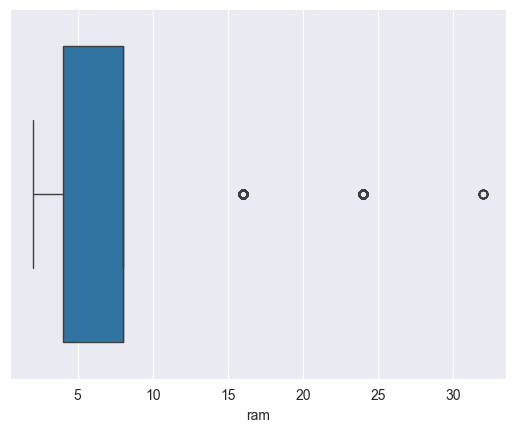

In [21]:
sns.boxplot(x=computers.ram)

<Axes: xlabel='ram'>

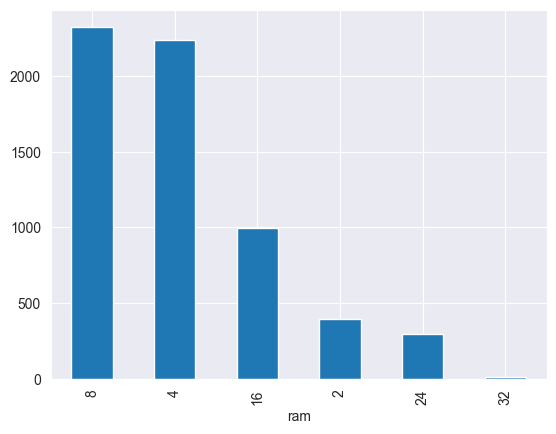

In [14]:
computers.ram.value_counts().plot.bar()

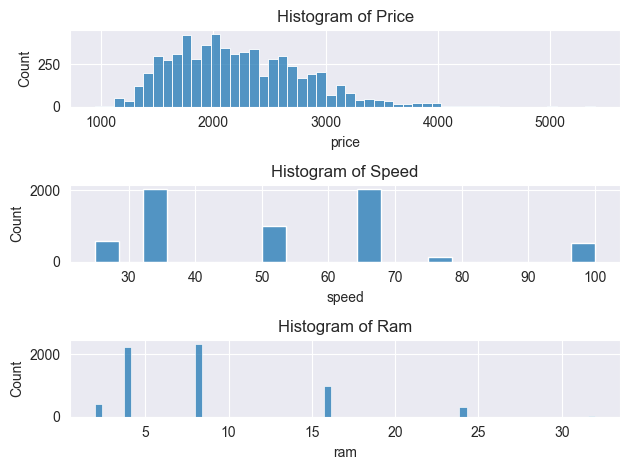

In [25]:
columns = ["price", "speed", "ram"]
data = computers

fig, ax = plt.subplots(len(columns), layout="tight")

for col, ax in zip(columns, ax.flat):
    sns.histplot(data=data, x=col, ax=ax)
    ax.set_title(f"Histogram of {col.title()}")

## Assignment 2: Variable Relationships

1. Build a correlation matrix of numeric features and pass it into a heatmap
2. Build a pairplot of numeric features in the data. Hint: df.select_dtypes("number") selects numeric columns. Consider sampling with df.sample(1000) to speed this up if it takes too long.
3. Build an lmplot of ram vs. price. Does being a premium model (premium == 'yes') impact this relationship? 

In [26]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


<Axes: >

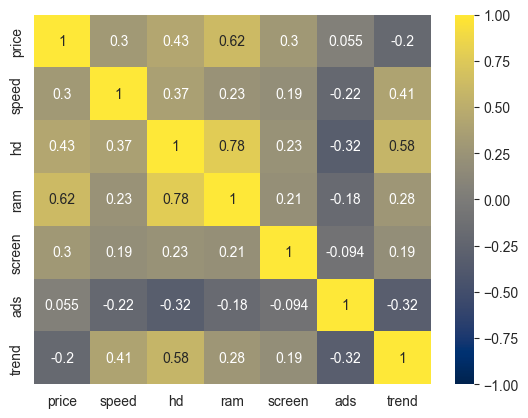

In [48]:
sns.heatmap(computers.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='cividis')